# Titanic - Machine Learning from Disaster

## Quarto modelo com Logistic Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sexo_binario(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Sex_binario'] = train['Sex'].map(sexo_binario)
test['Sex_binario'] = test['Sex'].map(sexo_binario)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = train[variaveis].fillna(-1)
y = train['Survived']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Novas variáveis

In [5]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int) - > Se não embarcou nas outras duas, teria sido nessa.

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [6]:
variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [7]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C',
           'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master',
            'Nome_contem_Col', 'Nome_contem_Major','Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [8]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print('Treino: ', linhas_treino.shape[0])
    print('Valid: ', linhas_valid.shape[0])
    print()
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_treino, y_treino)
    
    predict = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == predict)
    resultados.append(acc)
    print('Acc: ', acc)
    print()

Treino:  445
Valid:  446

Acc:  0.8295964125560538

Treino:  446
Valid:  445

Acc:  0.8089887640449438

Treino:  445
Valid:  446

Acc:  0.8139013452914798

Treino:  446
Valid:  445

Acc:  0.802247191011236

Treino:  445
Valid:  446

Acc:  0.8161434977578476

Treino:  446
Valid:  445

Acc:  0.8157303370786517

Treino:  445
Valid:  446

Acc:  0.8139013452914798

Treino:  446
Valid:  445

Acc:  0.8202247191011236

Treino:  445
Valid:  446

Acc:  0.8183856502242153

Treino:  446
Valid:  445

Acc:  0.8089887640449438

Treino:  445
Valid:  446

Acc:  0.8251121076233184

Treino:  446
Valid:  445

Acc:  0.8089887640449438

Treino:  445
Valid:  446

Acc:  0.8385650224215246

Treino:  446
Valid:  445

Acc:  0.8044943820224719

Treino:  445
Valid:  446

Acc:  0.8116591928251121

Treino:  446
Valid:  445

Acc:  0.8044943820224719

Treino:  445
Valid:  446

Acc:  0.8363228699551569

Treino:  446
Valid:  445

Acc:  0.8202247191011236

Treino:  445
Valid:  446

Acc:  0.8318385650224215

Treino:  446


(array([3., 3., 1., 4., 4., 0., 1., 1., 1., 2.]),
 array([0.80224719, 0.80587897, 0.80951076, 0.81314254, 0.81677432,
        0.82040611, 0.82403789, 0.82766967, 0.83130146, 0.83493324,
        0.83856502]),
 <BarContainer object of 10 artists>)

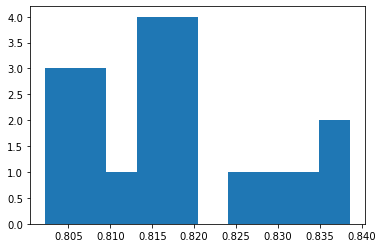

In [9]:
pylab.hist(resultados)

In [10]:
np.mean(resultados)

0.8175016375270822

In [11]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int) - > Se não embarcou nas outras duas, teria sido nessa.

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr').astype(int)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X, y)
    
predict = modelo.predict(test[variaveis].fillna(-1))

In [12]:
# Criar Submission

quarto_modelo = pd.Series(predict, index=test['PassengerId'], name='Survived')

quarto_modelo.shape[0]

418

In [13]:
quarto_modelo.head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Survived, dtype: int64

In [14]:
quarto_modelo.to_csv('quarto_modelo.csv', header=True) 